In [1]:
%run twisted_graphene.py

Primeiro, analisemos como o ângulo de rotação e o tamanho da célula unitária variam conforme navegamos no espaço de parâmetros $p,q$

Da expressão de $\theta(p,q)$ é possível depreender que a maneira mais fácil de fazer $\theta\rightarrow 0°$ (60°) é fixar $q$ ($p$) e aumentar $p$ ($q$). 

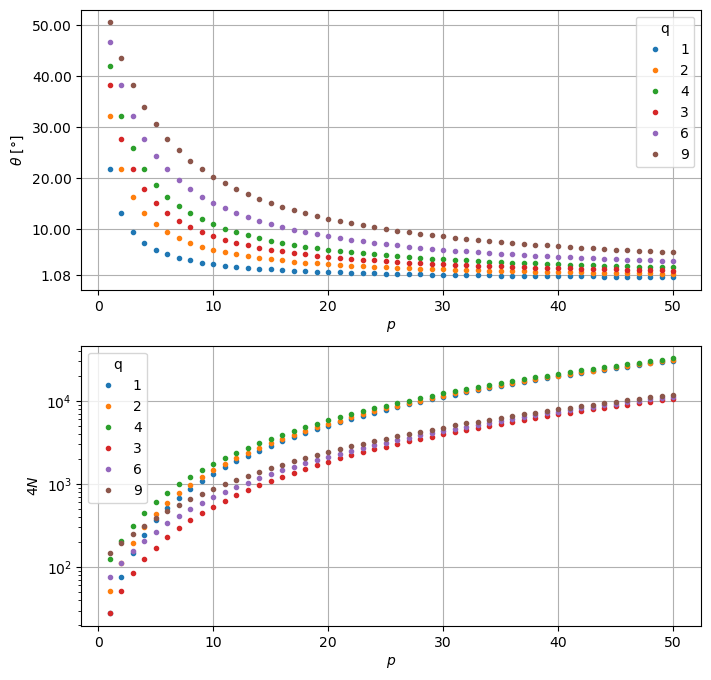

In [5]:
pp=np.arange(1,51)
qq=[1,2,4,3,6,9]
thetas,Ns=[],[]
for q in qq:
    thetas_q,Ns_q=[],[]
    for p in pp:
        thetas_q.append(twist_angle(p,q)*180/np.pi)
        Ns_q.append(4*number_of_sublattice_positions(p,q))
    thetas.append(thetas_q)
    Ns.append(Ns_q)
plt.figure(figsize=(8,8))
plt.subplot(211)
for i in range(len(qq)):
    plt.plot(pp,thetas[i],'.',label=qq[i])
plt.xlabel('$p$')
plt.ylabel('$\\theta$ [°]')
plt.grid(True)
plt.yticks([1.08,10,20,30,40,50])
plt.legend(title='q')
plt.subplot(212)
for i in range(len(qq)):
    plt.plot(pp,Ns[i],'.',label=qq[i])
plt.xlabel('$p$')
plt.ylabel('$4N$')
plt.grid(True)
plt.yscale('log')
plt.legend(title='q')
plt.show()

Dos gráficos acima, garantimos que, pelo menos dentre $q=1,2,4,3,6,9$, o jeito mais simples/eficiente de se aproximar do ângulo mágico é fazer $q=1$ e aumentar $p$, até chegar em $p=30$.

Agora rodemos os cálculos de bandas fixando $q=1$ e testando alguns valores de $p$.

Começando com 21.8°:

In [135]:
g=TwistedBilayerGraphene(1,1)

In [136]:
g.calc_hops(3.63864)

In [137]:
g.set_kpath(g.path_KGMKp,[20,20,20])

In [138]:
g.set_hamiltonian(0.0,0.0)

In [139]:
g.calc_bands(4,0.0)

In [140]:
g.bands0=g.bands

In [141]:
g.set_hamiltonian(1.0,0.0)

In [142]:
g.calc_bands(4,0.0)

In [143]:
g.bands1=g.bands

/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f83403d4340> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f83403d4310> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f83403d4040> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')


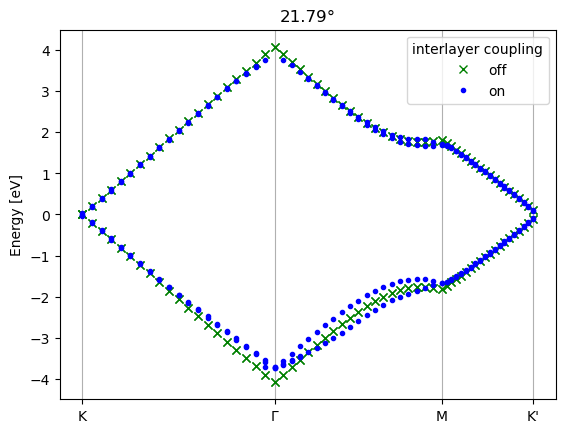

In [145]:
plt.plot(g.ell,g.bands0,'gx')
plt.plot(g.ell,g.bands1,'b.')
plt.title(f'{g.theta*180/np.pi:.2f}°')
plt.xticks(g.ell[g.kticks],['K','Γ','M',"K'"])
plt.grid(True,axis='x')
plt.ylabel('Energy [eV]')
plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
plt.ylim((-4.5,4.5))
plt.show()

Perceba a forte quebra de degenerescência no segmento ΓM devido a ativação do acoplamento inter-camada.

Daqui em diante, iremos fixar o eixo vertical na escala (-4.5,4.5) eV para observar o achatamento das bandas.

In [146]:
g=TwistedBilayerGraphene(5,1)

In [147]:
g.calc_hops(3.64)

In [148]:
g.set_kpath(g.path_KGMKp,[10,10,10])

In [149]:
g.set_hamiltonian(0.0,0.0)

In [150]:
g.calc_bands(4,0.0)

In [151]:
g.bands0=g.bands

In [152]:
g.set_hamiltonian(1.0,0.0)

In [153]:
g.calc_bands(4,0.0)

In [154]:
g.bands1=g.bands

/tmp/ipykernel_51476/367722535.py:8: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f834073cb80> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/367722535.py:8: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f834073cee0> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/367722535.py:8: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f834073cd00> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')


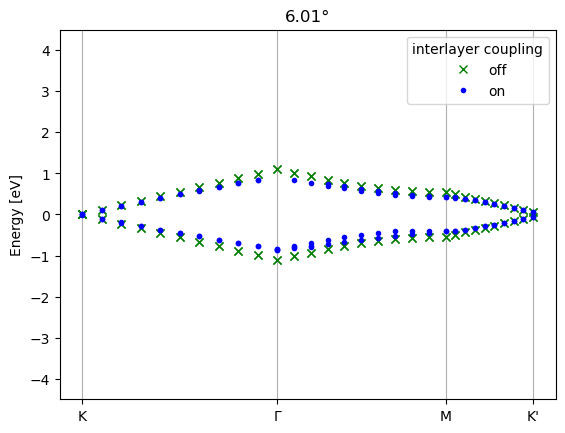

In [155]:
plt.plot(g.ell,g.bands0,'gx')
plt.plot(g.ell,g.bands1,'b.')

plt.title(f'{g.theta*180/np.pi:.2f}°')
plt.xticks(g.ell[g.kticks],['K','Γ','M',"K'"])
plt.grid(True,axis='x')
plt.ylabel('Energy [eV]')
plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
plt.ylim((-4.5,4.5))
plt.show()

Já observamos um achatamento considerável, mesmo para um ângulo não tão pequeno (6.01°).

In [156]:
g=TwistedBilayerGraphene(10,1)

In [157]:
g.calc_hops(3.64)

In [158]:
g.set_kpath(g.path_KGMKp,[10,10,10])

In [159]:
g.set_hamiltonian(0.0,0.0)

In [160]:
g.calc_bands(4,0.0)

In [161]:
g.bands0=g.bands

In [162]:
g.set_hamiltonian(1.0,0.0)

In [163]:
g.calc_bands(4,0.0)

In [164]:
g.bands1=g.bands

/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f83403ec6a0> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f83403ec7c0> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f83403ec8e0> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')


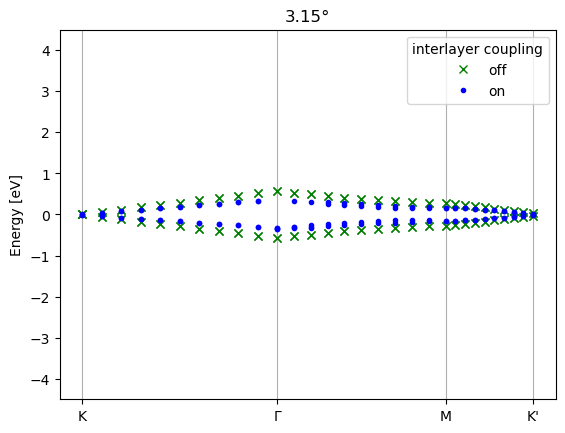

In [165]:
plt.plot(g.ell,g.bands0,'gx')
plt.plot(g.ell,g.bands1,'b.')
plt.title(f'{g.theta*180/np.pi:.2f}°')
plt.xticks(g.ell[g.kticks],['K','Γ','M',"K'"])
plt.grid(True,axis='x')
plt.ylabel('Energy [eV]')
plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
plt.ylim((-4.5,4.5))
plt.show()

In [166]:
g=TwistedBilayerGraphene(20,1)

In [167]:
g.calc_hops(3.64)

In [168]:
g.set_kpath(g.path_KGMKp,[10,10,10])

In [169]:
g.set_hamiltonian(0.0,0.0)

In [170]:
g.calc_bands(4,0.0)

In [171]:
g.bands0=g.bands

In [172]:
g.set_hamiltonian(1.0,0.0)

In [173]:
g.calc_bands(4,0.0)

In [174]:
g.bands1=g.bands

/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f68e230> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f68e350> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f68e470> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')


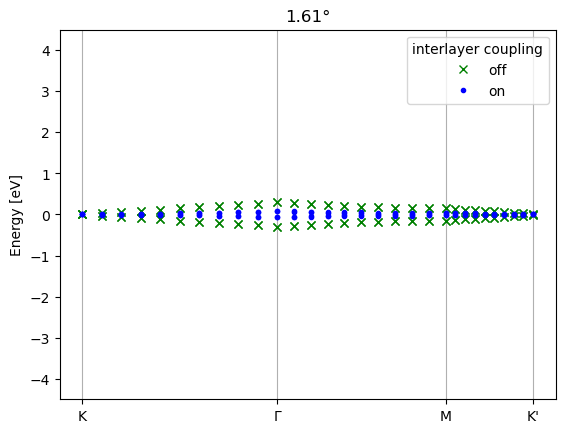

In [175]:
plt.plot(g.ell,g.bands0,'gx')
plt.plot(g.ell,g.bands1,'b.')
plt.title(f'{g.theta*180/np.pi:.2f}°')
plt.xticks(g.ell[g.kticks],['K','Γ','M',"K'"])
plt.grid(True,axis='x')
plt.ylabel('Energy [eV]')
plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
plt.ylim((-4.5,4.5))
plt.show()

E finalmente:

In [3]:
g=TwistedBilayerGraphene(30,1) #magic angle

In [4]:
g.calc_hops(3.64)

/home/vgmdu/MEGA/Mestrado/twistrônica/code/twisted_graphene.py:148: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Mestrado/twistrônica/code/twisted_graphene.py:149: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


In [178]:
g.set_kpath(g.path_KGMKp,[10,10,10])

In [179]:
g.set_hamiltonian(0.0,0.0)

In [180]:
g.calc_bands(4,0.0)

In [181]:
g.bands0=g.bands

In [182]:
g.set_hamiltonian(1.0,0.0)

In [183]:
g.calc_bands(4,0.0)

In [184]:
g.bands1=g.bands

/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f725780> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f725450> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/31192789.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f727520> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')


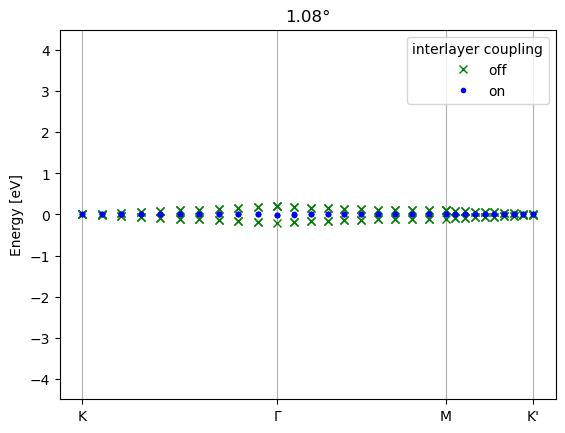

In [187]:
plt.plot(g.ell,g.bands0,'gx')
plt.plot(g.ell,g.bands1,'b.')
plt.title(f'{g.theta*180/np.pi:.2f}°')
plt.xticks(g.ell[g.kticks],['K','Γ','M',"K'"])
plt.grid(True,axis='x')
plt.ylabel('Energy [eV]')
plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
plt.ylim((-4.5,4.5))
plt.show()

Como esperado, a banda é extremamente flat em 1.08°, o que indica a formação de estados altamente localizados no espaço real.

Examinemos essa banda mais de perto:

/tmp/ipykernel_51476/1919879739.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f6b4e20> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/1919879739.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f6b4ee0> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
/tmp/ipykernel_51476/1919879739.py:7: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f833f6b4d00> has a label of '__nolegend__' which cannot be automatically added to the legend.
  plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')


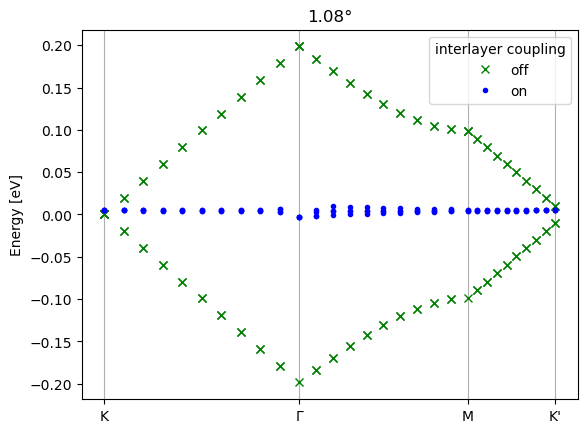

In [188]:
plt.plot(g.ell,g.bands0,'gx')
plt.plot(g.ell,g.bands1,'b.')
plt.title(f'{g.theta*180/np.pi:.2f}°')
plt.xticks(g.ell[g.kticks],['K','Γ','M',"K'"])
plt.grid(True,axis='x')
plt.ylabel('Energy [eV]')
plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
plt.show()

Perceba o pequeno "bump" em Gamma, já esperado. Pode ser interessante calcular algumas bandas a mais para enxergar o que está acontecendo:

In [5]:
g.set_kpath(g.path_KGMKp,[50,50,10])

In [6]:
g.set_hamiltonian(0.0,0.0)

In [7]:
g.calc_bands(12,0.0)

In [8]:
g.bands0=g.bands

In [9]:
g.set_hamiltonian(1.0,0.0)

In [10]:
g.calc_bands(12,0.0)

In [11]:
g.bands1=g.bands

In [12]:
g.bands1.sort(axis=-1)

In [27]:
np.savez('matbg',hops=g.hops,bands0=g.bands0,bands1=g.bands1)

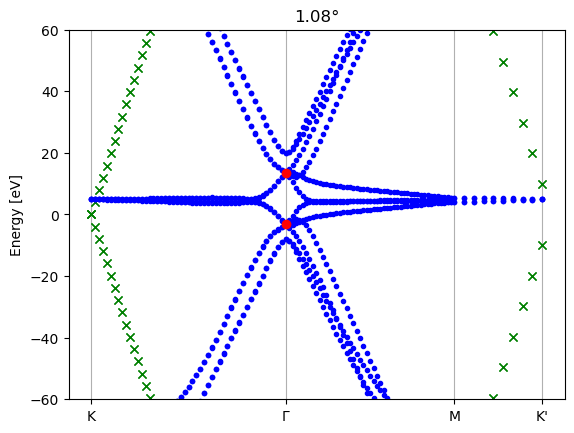

In [26]:
plt.plot(g.ell,1000*g.bands0,'gx')
plt.plot(g.ell,1000*g.bands1,'b.')
plt.plot(g.ell[g.kticks[1]],1000*g.bands1[g.kticks[1],6],'ro')
plt.plot(g.ell[g.kticks[1]],1000*g.bands1[g.kticks[1],5],'ro')
plt.title(f'{g.theta*180/np.pi:.2f}°')
plt.xticks(g.ell[g.kticks],['K','Γ','M',"K'"])
plt.grid(True,axis='x')
plt.ylabel('Energy [eV]')
# plt.legend(['off']+3*['__nolegend__']+['on'],title='interlayer coupling')
plt.ylim((-60,60))
plt.show()

De fato, persiste uma pequena abertura em Gamma, que está de acordo com outros trabalhos qualitativamente.

Essa diferença de energia em Gamma, em meV, é de:

In [23]:
1000*(g.bands1[g.kticks[1],6]-g.bands1[g.kticks[1],5])

16.48597960930133

Que é quantitativamente diferente do modelo de 6 bandas de férmions pesados que vimos em Valência:

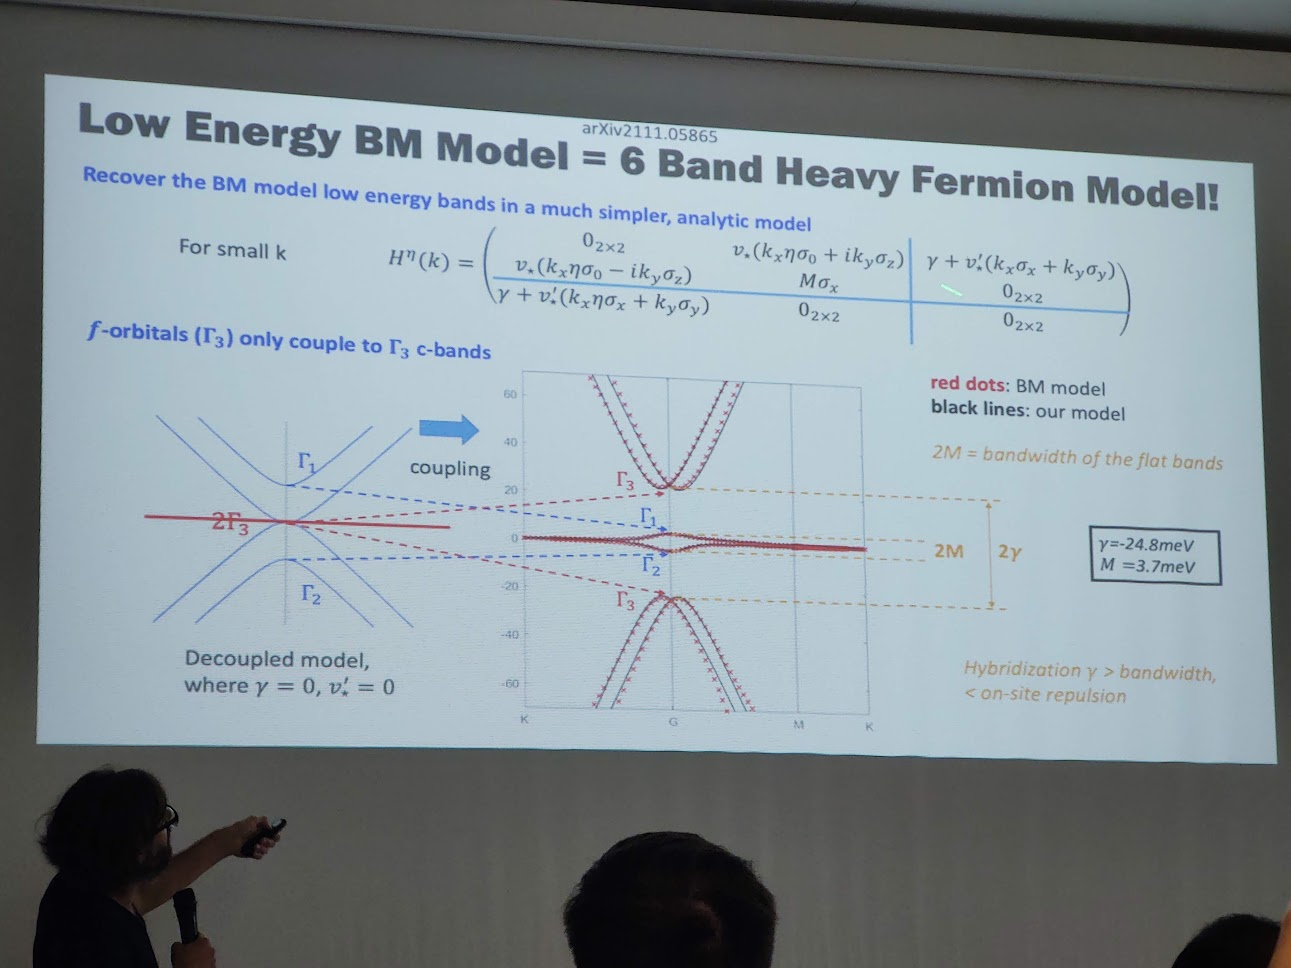

No modelo dele, o bandwidth é 2M = 7.4 meV, e as bandas de fundo não encostam nas VBM/CBM. Além disso, no meu modelo tem umas bandas "a mais" no segmento Gamma-M, que não sei ao certo se pode ser algum folding ou algo do gênero.